# 일정시간 (ex. 앞 0.5초 ref 뒤 0.5 after 이런식으로 데이터 표시하기.)

In [1]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_1_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-17 23:59:20.523,0.227267,0.699052,0.294166,0.706565,0.369843,0
1,1,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
2,2,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
3,3,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
4,4,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
...,...,...,...,...,...,...,...,...
66235,66276,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66236,66277,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66237,66278,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66238,66279,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0


In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-17 23:59:20.523,0.227267,0.699052,0.294166,0.706565,0.369843,0
1,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
2,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
3,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
4,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0


In [3]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 6960,
 9780,
 12600,
 15408,
 18228,
 28716,
 31536,
 34352,
 37176,
 39984,
 50484,
 53292,
 56114,
 58932,
 61752,
 66240]

In [12]:
# 시간 간격 정해서 체크해주는거
data['temp'] = 0
start_idx = 0
end_idx = 0
# time_s = datetime.timedelta(days=14)
time_s = datetime.strptime('0:00:02.100000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.100000', "%H:%M:%S.%f") 
time_e = datetime.strptime('0:00:01.500000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") 
# time_delta로 맞춰줘야해서 
print(time_s, time_e)

# time_s = datetime.strptime('0:00:01.000000', "%H:%M:%S.%f") # 200ms 만들기
# time_e = datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") # 200ms 만들기


for j in range(0, len(point)-1) :
    globals()['temp_idx_ref{}'.format(j)] = []
    globals()['temp_idx_after{}'.format(j)] = []
    for i in range(point[j-1], point[j]) : # stimulus time부터 앞으로 1.0~0.5s에 1 표시한거 즉, 자극 이전 레퍼런스 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = time_stimulus - time_data
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'ref'
            globals()['temp_idx_ref{}'.format(j)].append(i) # 각 인덱스 저장해주는 코드
        
    for i in range(point[j], point[j+1]) : # stimulus time부터 뒤로 0.5~1.0s에 2 표시한거 즉, 자극 이후 변화한 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = -(time_stimulus - time_data)
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'after'
            globals()['temp_idx_after{}'.format(j)].append(i)
        


0:00:02 0:00:01


<ipython-input-12-75ed5bf5c59f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'after'
<ipython-input-12-75ed5bf5c59f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'ref'


In [15]:
temp_idx_after1[-1]

7475

In [5]:
# 일정 시간 잘라서 ref와 after 표시한거 파일로 저장
data.to_excel("./clean_dataset/clean_stimulus/session_3_clean_stimulus_1sec.xlsx")

# after-ref / ref 비율 확인하기 & after - ref 변화량 확인하기

In [6]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/clean_stimulus/session_3_clean_stimulus_1sec.xlsx') # stimulus 시점 표시된 clean data 가져오기.

# 히트맵 만들기 (각 밴드별로, 1sec니까 히트맵 행은 20개 정도)

In [17]:
bins = list(range(temp_idx_after1[0],temp_idx_after1[-1], 10))

In [18]:
bins

[7224,
 7234,
 7244,
 7254,
 7264,
 7274,
 7284,
 7294,
 7304,
 7314,
 7324,
 7334,
 7344,
 7354,
 7364,
 7374,
 7384,
 7394,
 7404,
 7414,
 7424,
 7434,
 7444,
 7454,
 7464,
 7474]

In [20]:
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,temp
0,0,2022-07-17 23:59:20.523,0.227267,0.699052,0.294166,0.706565,0.369843,0,0
1,1,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0,0
2,2,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0,0
3,3,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0,0
4,4,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0,0
...,...,...,...,...,...,...,...,...,...
66235,66235,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0,0
66236,66236,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0,0
66237,66237,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0,0
66238,66238,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0,0


In [22]:
bins

[7224,
 7234,
 7244,
 7254,
 7264,
 7274,
 7284,
 7294,
 7304,
 7314,
 7324,
 7334,
 7344,
 7354,
 7364,
 7374,
 7384,
 7394,
 7404,
 7414,
 7424,
 7434,
 7444,
 7454,
 7464,
 7474]

In [32]:
# after1_10_mean = []
# for i in range(0,len(bins)-1):
#     k = data['Beta_AF8'][bins[i]:bins[i+1]].mean()
#     after1_10_mean.append(k)
    

In [34]:
after1_mean_10_sec = pd.DataFrame(columns=['delta','theta','alpha','beta','gamma'])
for i in range(0,len(bins)-1):
    delta = data['Delta_AF8'][bins[i]:bins[i+1]].mean()
    theta = data['Theta_AF8'][bins[i]:bins[i+1]].mean()
    alpha = data['Alpha_AF8'][bins[i]:bins[i+1]].mean()
    beta = data['Beta_AF8'][bins[i]:bins[i+1]].mean()
    gamma = data['Gamma_AF8'][bins[i]:bins[i+1]].mean()
    
    after1_mean_10_sec.loc[i]=[delta,theta,alpha,beta,gamma]

In [35]:
after1_mean_10_sec

,delta,theta,alpha,beta,gamma
0,-0.038070,0.110993,0.314701,0.529893,0.208469
1,0.096733,0.112221,0.380722,0.526768,0.222175
2,0.096733,0.112221,0.380722,0.526768,0.222175
3,0.191092,0.127610,0.408240,0.526508,0.233737
4,0.285451,0.142999,0.435758,0.526247,0.245299
5,0.285451,0.142999,0.435758,0.526247,0.245299
6,0.435684,0.179445,0.467911,0.524038,0.263678
7,0.452377,0.183495,0.471484,0.523792,0.265720
8,0.488655,0.192534,0.475461,0.521043,0.269317
9,0.573306,0.213627,0.484740,0.514628,0.277712


In [37]:
!pip install seaborn

     |████████████████████████████████| 292 kB 11.0 MB/s eta 0:00:01


In [39]:
after1_mean_10_sec_T = after1_mean_10_sec.transpose()

Text(0.5, 30.5, 'Time(sec)')

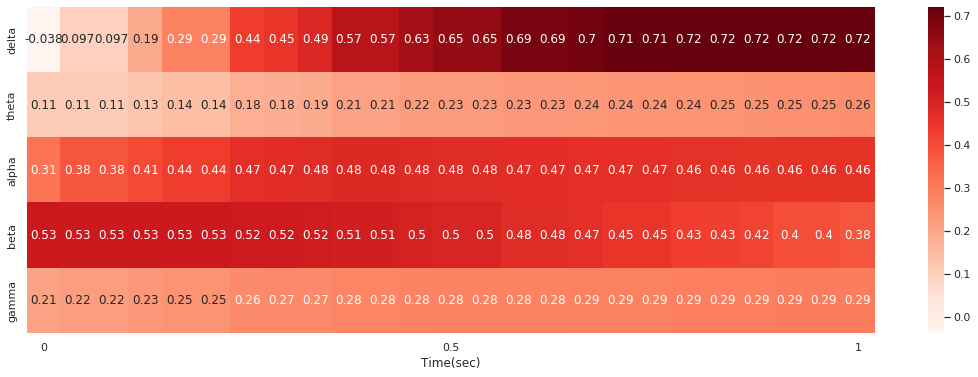

In [57]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(19,6)})
ax=sns.heatmap(after1_mean_10_sec_T, cmap='Reds', annot=True,xticklabels=xtime)
plt.xlabel("Time(sec)")

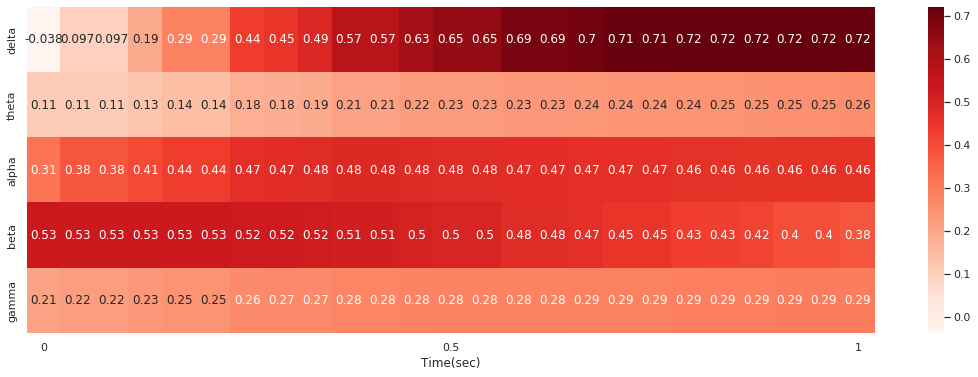

In [66]:
splot = sns.heatmap(after1_mean_10_sec_T, cmap='Reds', annot=True,xticklabels=xtime)
sfig = splot.get_figure()
plt.xlabel("Time(sec)")
sfig.savefig('filename.png',  orientation="landscape")

In [33]:
after1_10_mean

[0.5298927069999999,
 0.52676797,
 0.52676797,
 0.526507535,
 0.5262471,
 0.5262471,
 0.5240375100000001,
 0.523792,
 0.52104277,
 0.5146279,
 0.5146279,
 0.503026478,
 0.49805443999999993,
 0.495951296,
 0.477023,
 0.477023,
 0.4658106,
 0.45459820000000006,
 0.45459820000000006,
 0.431959888,
 0.42944452,
 0.420660484,
 0.4001644,
 0.4001644,
 0.380074589]

In [29]:
# globals()['{}after_10_mean'.format(j)] = []
after1_10_mean_ = []
for i in range(0,len(bins)-1):
    k = data['Theta_AF8'][bins[i]:bins[i+1]].mean()
    globals()['{}after_10_mean'.format(i)].append(k)
    

0.11099333199999999
0.11222130999999999
0.11222130999999999
0.127609935
0.14299856000000002
0.14299856000000002
0.17944503199999998
0.18349464
0.192534339
0.21362697000000003
0.21362697000000003
0.22353739499999997
0.22778471999999997
0.22836423399999997
0.23357986
0.23357986
0.236256675
0.23893349000000003
0.23893349000000003
0.244918022
0.24558297
0.247653528
0.25248483000000005
0.25248483000000005
0.256954869


In [22]:
# 빈 데이터프레임 생성. (ratio 저장할거)
df_ratio = pd.DataFrame(columns=['ratio_delta','ratio_theta','ratio_alpha','ratio_beta','ratio_gamma'])
for i in range(1, 16):
    ref_delta = data[data['temp'] == str(i)+'ref']['Delta_AF8'].mean()
    after_delta = data[data['temp'] == str(i)+'after']['Delta_AF8'].mean()
    ratio_delta = (after_delta-ref_delta)/ref_delta
    if ref_delta < 0 : 
        ratio_delta = -(ratio_delta)
    
    ref_theta = data[data['temp'] == str(i)+'ref']['Theta_AF8'].mean()
    after_theta = data[data['temp'] == str(i)+'after']['Theta_AF8'].mean()
    ratio_theta = (after_theta-ref_theta)/ref_theta
    if ref_theta < 0 : 
        ratio_theta = -(ratio_theta)
    
    ref_alpha = data[data['temp'] == str(i)+'ref']['Alpha_AF8'].mean()
    after_alpha = data[data['temp'] == str(i)+'after']['Alpha_AF8'].mean()
    ratio_alpha = (after_alpha-ref_alpha)/ref_alpha
    if ref_alpha < 0 : 
        ratio_alpha = -(ratio_alpha)
    
    ref_beta = data[data['temp'] == str(i)+'ref']['Beta_AF8'].mean()
    after_beta = data[data['temp'] == str(i)+'after']['Beta_AF8'].mean()
    ratio_beta = (after_beta-ref_beta)/ref_beta
    if ref_beta < 0 : 
        ratio_beta = -(ratio_beta)
    
    ref_gamma = data[data['temp'] == str(i)+'ref']['Gamma_AF8'].mean()
    after_gamma = data[data['temp'] == str(i)+'after']['Gamma_AF8'].mean()
    ratio_gamma = (after_gamma-ref_gamma)/ref_gamma
    if ref_gamma < 0 : 
        ratio_gamma = -(ratio_gamma)
    
    df_ratio.loc[i]=[ratio_delta,ratio_theta,ratio_alpha,ratio_beta, ratio_gamma]

In [ ]:
temp_idx=[]
if data[data['temp']] == '1ref' :
    temp_idx.append(i)